### Pair X
# Métricas

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Librerías para la visualización de los datos
# ------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer la paleta de color de gráficas
# ==================================
qualitative_colors = sns.color_palette("Spectral")
# Gestión de los warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

#  Modelado y evaluación
# -----------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

- En el pair programming anterior creastéis vuestro primer modelo de machine learning usando la regresion Lineal. Es el momento, que con vuestros datos evaluéis si es bueno haciendo predicciones. Los objetivo de este pairprogramming son:

  - Calculéis las métricas para vuestro modelo

  - Discutid los resultados de las métricas y extraed conclusiones

  - Guardad los resultados de las métricas en un csv para usarlo más adelante.

In [2]:
df = pd.read_pickle("../data/9_ajuste.pkl")
df.sample(2)

,salario,cesta_compra,bebidas_super,bebidas_rest,comida_rest,ropa,deportes,cine,marlboro,educacion,transporte,gasolina,vehiculos,internet,movil,gastos_fijos,alquiler,m2,inte_fij_hipo,continente_oe
3481,1943.23,3.938571,2.71,3.456,23.543333,79.2775,26.103,11.43,10.390,415.48,14.884,2.07,25065.485,38.34,0.13,161.71,694.63,2700.610,1.64,2
2530,247.18,2.405143,1.73,0.574,5.663333,42.3550,12.360,3.09,3.462,30.90,3.806,0.62,15680.520,18.54,0.06,30.90,123.59,708.781,5.00,4


In [3]:
df.duplicated().sum()

0

In [4]:
X = df.drop("salario", axis = 1)
y = df["salario"]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [6]:
lr = LinearRegression(n_jobs=-1)

In [7]:
lr.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [8]:
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test) 

In [9]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head()

,Real,Predicted,Set
708,350.000,1144.525888,Train
2649,2495.786,2605.051066,Train
1451,184.340,635.073081,Train
4510,2729.396,3238.504048,Train
1691,1350.310,1553.634673,Train


In [10]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head()

,Real,Predicted,Set,residuos
708,350.000,1144.525888,Train,-794.525888
2649,2495.786,2605.051066,Train,-109.265066
1451,184.340,635.073081,Train,-450.733081
4510,2729.396,3238.504048,Train,-509.108048
1691,1350.310,1553.634673,Train,-203.324673


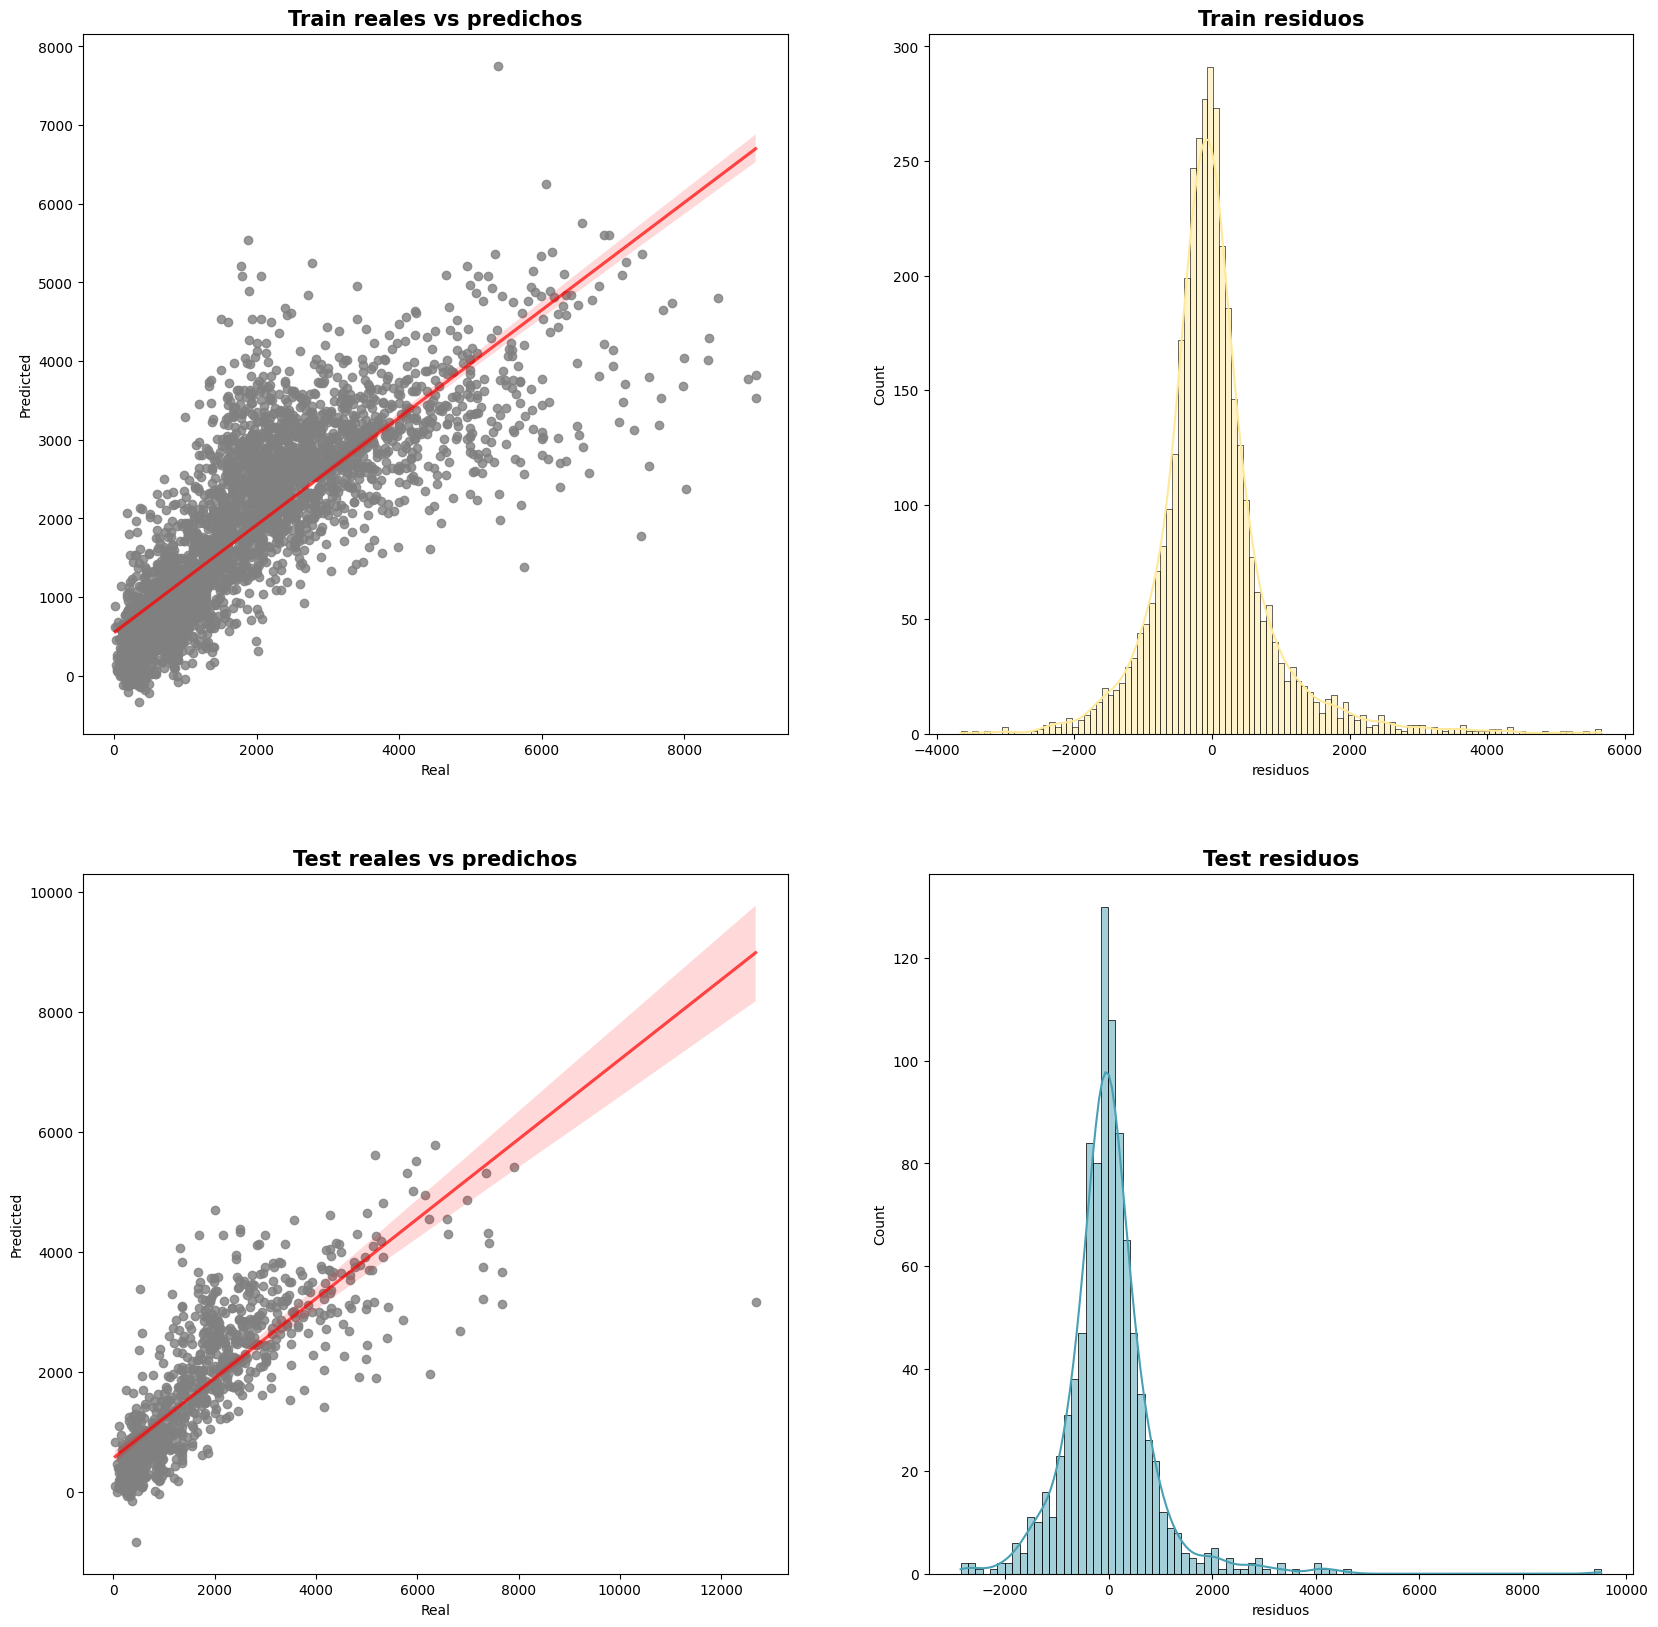

In [11]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "red", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color = qualitative_colors [2],
             kde=True, 
             ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = qualitative_colors[5],
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold")
plt.savefig("../graficas/10_metricas_regplot_histplot.png");


In [15]:
# Para el conjunto de entrenamsiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_predict_test))
print('El MAE es',mean_absolute_error(y_test,y_predict_test))
print('El MSE es',mean_squared_error(y_test,y_predict_test))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_predict_test)))

Para el conjunto train:---------------
El valor de r2 score es  0.6836193124710503
El MAE es 536.4600608615709
El MSE es 666194.1377896841
EL RMSE es  816.2071659754552
Para el conjunto test:---------------
El valor de r2 score es  0.6565014052378495
El MAE es 547.7985669318484
El MSE es 748402.4702361446
EL RMSE es  865.102577869321


In [16]:
resultados_metricas = {'MAE': [mean_absolute_error(y_test, y_predict_test), mean_absolute_error(y_train, y_predict_train)],
                'MSE': [mean_squared_error(y_test, y_predict_test), mean_squared_error(y_train, y_predict_train)],
                'RMSE': [np.sqrt(mean_squared_error(y_test, y_predict_test)), np.sqrt(mean_squared_error(y_train, y_predict_train))],
                'R2':  [r2_score(y_test, y_predict_test), r2_score(y_train, y_predict_train)],
                 "set": ["test", "train"], 
                 "modelo": ["Linear Regresion", "LinearRegression"]}

df_resultados = pd.DataFrame(resultados_metricas)

df_resultados

,MAE,MSE,RMSE,R2,set,modelo
0,547.798567,748402.470236,865.102578,0.656501,test,Linear Regresion
1,536.460061,666194.137790,816.207166,0.683619,train,LinearRegression


- El 65% de nuestras variables predictoras predicen nuestra variable respuesta, mientras que en un 35% restante no se podría explicar con las variables predictoras que tenemos.
- El RMSE es la mejor capacidad de ajuste al modelo, la distancia entre el valor predicho y real. En este caso vemos que es un valor muy alto, alejándose el valor predicho del real.
- Vemos que los valores de train y test son muy parecidos, consideramos que no tenemos overfitting.

In [17]:
resultados

,Real,Predicted,Set,residuos
708,350.000,1144.525888,Train,-794.525888
2649,2495.786,2605.051066,Train,-109.265066
1451,184.340,635.073081,Train,-450.733081
4510,2729.396,3238.504048,Train,-509.108048
1691,1350.310,1553.634673,Train,-203.324673
...,...,...,...,...
1767,372.680,602.122242,Test,-229.442242
1859,400.000,113.475593,Test,286.524407
4279,345.140,709.364587,Test,-364.224587
650,341.810,436.971615,Test,-95.161615


En nuestro caso tenemos residuos positivos, el valor Y es mayor que el valor estimado por lo que se infravalora la variable respuesta "salario". Por otro lado, también encontramos residuos negativos, el valor Y es menor que el valor estimado por lo tanto se sobrevalora la variable respuesta "salario".

In [19]:
df.to_pickle("../data/10_metricas.pkl")